<a href="https://colab.research.google.com/github/antonsysoev/comp_tech_2024/blob/main/Lecture_13_Examples_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("seasonal")
install.packages("fpp2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘x13binary’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’




In [3]:
library(tidyverse)
library(seasonal)
library(fpp2)


Attaching package: ‘seasonal’


The following object is masked from ‘package:tibble’:

    view


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ forecast  8.23.0     ✔ expsmooth 2.3   
✔ fma       2.5        





**Чтение данных**

Мы будем работать с данными о розничной торговле. Начнем с данных о мебели и товарах для дома. Затем мы посмотрим на первые 6 строк с помощью функции head().

In [5]:
furniture <- read_csv("/content/retail-sales-furniture-and-home-furnishings-stores.csv")
head(furniture)

Rows: 321 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): value
date (3): realtime_start, realtime_end, date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


realtime_start,realtime_end,date,value
<date>,<date>,<date>,<dbl>
2018-12-11,2018-12-11,1992-01-01,3846
2018-12-11,2018-12-11,1992-02-01,3908
2018-12-11,2018-12-11,1992-03-01,4157
2018-12-11,2018-12-11,1992-04-01,4141
2018-12-11,2018-12-11,1992-05-01,4275
2018-12-11,2018-12-11,1992-06-01,4357


Мы можем сказать, что это ежемесячные данные и что они начинаются в 1992 году. Давайте превратим столбец value в объект временного ряда с помощью функции ts(), а затем выведем его на печать.

In [6]:
sales <- ts(furniture$value)
sales

A Time Series:
  [1]  3846  3908  4157  4141  4275  4357  4407  4446  4328  4497  4687  5287
 [13]  4104  3908  4369  4372  4535  4568  4682  4733  4621  4775  5158  5631
 [25]  4018  4140  4827  4700  4867  4958  4980  5356  5203  5328  5734  6305
 [37]  4649  4410  5084  4818  5195  5196  5190  5506  5418  5505  6090  6409
 [49]  4788  4833  5410  5310  5603  5479  5673  5893  5589  5970  6425  6734
 [61]  5311  5116  5715  5670  6010  5805  6027  6263  6094  6369  6781  7554
 [73]  5822  5581  6162  6038  6225  6310  6466  6502  6329  6693  7186  8098
 [85]  5922  5996  6790  6481  6684  6853  6961  7240  7139  7339  8006  8883
 [97]  6638  6989  7622  7134  7635  7487  7508  7974  7535  7667  8346  8635
[109]  7050  6797  7572  6940  7551  7491  7456  7971  7078  7603  8548  9427
[121]  7149  7091  7777  7370  7991  7502  7671  8205  7456  7859  8839  9528
[133]  7190  6713  7618  7374  8078  7753  8074  8384  8017  8351  9018 10166
[145]  7651  7613  8499  7991  8112  8443  8895  8883  8441  8718  9594 10917
[157]  7908  7973  8787  8418  8649  8966  8957  9607  9216  9110 10232 11297
[169]  8595  8457  9412  8556  9209  9447  9244  9940  9511  9178 10195 11051
[181]  8802  8423  9415  8553  9266  9171  9194  9867  8885  9069 10012 10487
[193]  8163  8104  8381  8029  8604  8117  8495  8456  7676  7712  8121  8862
[205]  6796  6593  6907  6608  6974  6922  7194  7159  6967  6853  7375  8401
[217]  6324  6468  7271  6729  6932  6902  7243  7330  7101  6793  7630  8482
[229]  6244  6488  7530  6896  7086  7039  7241  7685  7450  6967  7931  9029
[241]  6866  7169  7784  6872  7683  7378  7551  8064  7439  7260  8260  9216
[253]  7297  7089  7875  7314  7834  7558  7977  8461  7848  8059  8842  9195
[265]  7201  7227  8104  7791  8384  7881  8403  8734  8371  8441  8950 10231
[277]  7964  7514  8616  8261  8893  8576  9110  9148  8967  9108  9488 10925
[289]  8188  8395  9281  8629  9036  9157  9235  9639  9621  9160 10089 11038
[301]  8480  8471  9945  8878  9755  9717  9588 10246  9879  9851 10915 11636
[313]  9016  8816 10353  9527 10286 10103 10113 10615  9928

Поскольку мы знаем, что это ежемесячные данные и начинаются они в 1992 году, давайте обновим частоту и начальные аргументы.

In [7]:
sales <- ts(furniture$value, frequency = 12, start = 1992)
sales

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1992,3846,3908,4157,4141,4275,4357,4407,4446,4328,4497,4687,5287
1993,4104,3908,4369,4372,4535,4568,4682,4733,4621,4775,5158,5631
1994,4018,4140,4827,4700,4867,4958,4980,5356,5203,5328,5734,6305
1995,4649,4410,5084,4818,5195,5196,5190,5506,5418,5505,6090,6409
1996,4788,4833,5410,5310,5603,5479,5673,5893,5589,5970,6425,6734
1997,5311,5116,5715,5670,6010,5805,6027,6263,6094,6369,6781,7554
1998,5822,5581,6162,6038,6225,6310,6466,6502,6329,6693,7186,8098
1999,5922,5996,6790,6481,6684,6853,6961,7240,7139,7339,8006,8883
2000,6638,6989,7622,7134,7635,7487,7508,7974,7535,7667,8346,8635
2001,7050,6797,7572,6940,7551,7491,7456,7971,7078,7603,8548,9427


Функция ts() предполагает, что при указании числа 12 для частоты вы имеете в виду ежемесячные данные. Если вы укажете значение 7, это предполагает ежедневные данные (т. е. воскресенье-суббота), а 4 даст вам квартальные наблюдения. Наконец, если бы наши данные гипотетически начинались в марте, а не в январе, мы бы обновили значение start, указав «start = c(1992,3)».

**Базовые графики**

Мы рассмотрим два основных вида графиков

*   Временные графики, autoplot()
*   Сезонные графики, ggseasonplot()


Сначала построим временной график наших данных с помощью функции autoplot(), которая удобна для работы с временными рядами.

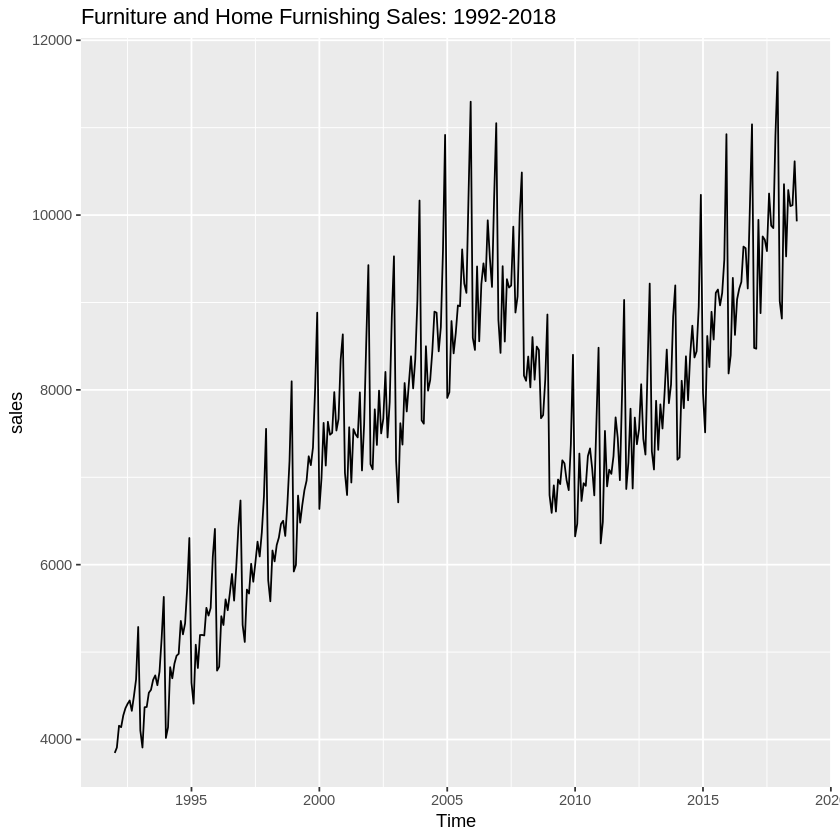

In [8]:
autoplot(sales, main = "Furniture and Home Furnishing Sales: 1992-2018")

Из этого можно сделать несколько выводов

* Существует общая тенденция к росту
* Тенденция не постоянна, она снижается во время рецессии
* Существуют различия в продажах в зависимости от месяца.

Чтобы получить более четкое представление о различиях в сезонах (месяцах), давайте построим график сезонов с помощью функции ggseasonplot()

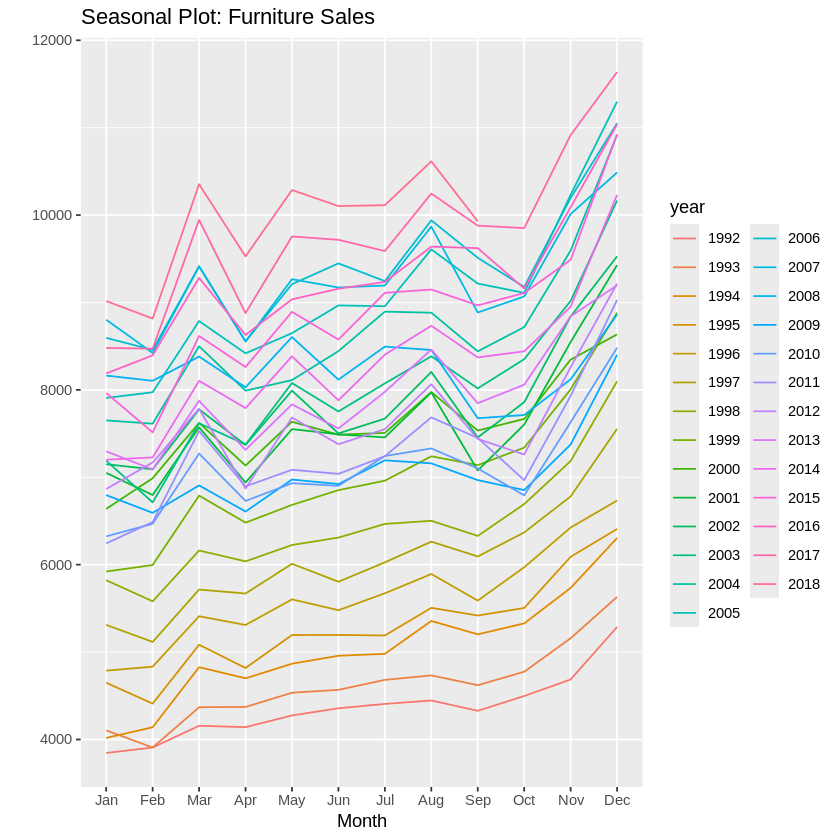

In [9]:
ggseasonplot(sales, main = "Seasonal Plot: Furniture Sales")

На этом графике видно, что в конце каждого года наблюдается скачок, а в марте и августе - небольшой всплеск. Чтобы получить еще более четкое представление о тенденции и сезонных движениях, мы пройдем через процесс, называемый декомпозицией временного ряда.

**Декомпозиция временных рядов**

Чтобы получить или представить базовое понимание данных, необходимо их разложить.

*Результаты декомпозиции*

* Основная тенденция ваших данных сезонный фактор
* Остаток, который объясняет то, что не объясняют тренд и сезонный фактор.
* Тренд, который вы получите в результате, будет считаться «десезонированным» или «сезонно скорректированным»

Наличие десезонированных данных полезно, так как легче найти корреляции между двумя переменными, если они имеют разные сезонные тренды.

Вы также можете следовать этому простому прогностическому процессу:

1. Десезонируйте данные, чтобы выделить тренд
2. Спрогнозируйте или экстраполируйте эту тенденцию
3. Повторно проанализируйте свой прогноз.

**Типы сезонных разложений**

* *Аддитивная сезонная декомпозиция*: Каждый сезон сдвигается на постоянное число, которое добавляется или вычитается из тренда (например, вычесть $100 из продаж купальников в декабре).

* *Мультипликативная сезонная декомпозиция*: Каждый сезон имеет число, которое мы умножаем на тренд (например, мы умножаем продажи купальников на 1,2 в июле).

**Процесс сезонной декомпозиции в R**

* Используйте функцию decompose() или seas() для извлечения сезонных движений и тренда.

* Используйте функцию autoplot() для визуализации корректировок


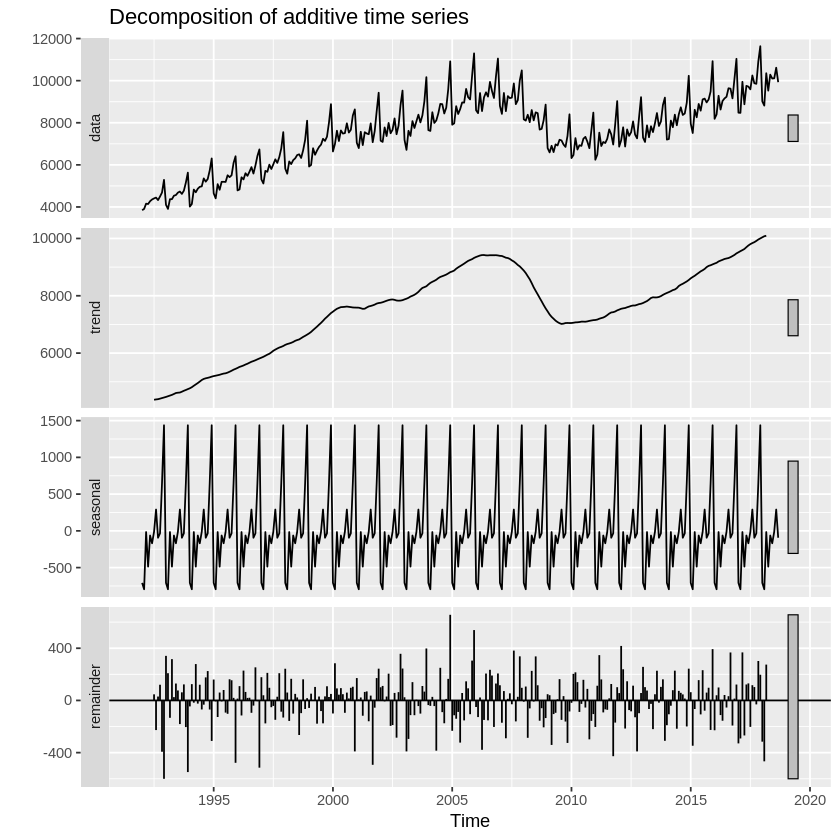

In [10]:
decomposed_sales_additive <- decompose(sales, type = "additive")
autoplot(decomposed_sales_additive)

Наши исходные данные  теперь разбиты на 3 компонента.

* сезонный компонент
* трендовый компонент
* остаток

Поскольку наше разложение было аддитивным, мы можем сложить ряды  и получить верхнюю панель, т.е.

$$данные = тренд + сезонность + остаток$$

Здесь идеальным является значение остатка, равное 0, поскольку это означает, что данные могут быть объяснены только сезоном и трендом.

Помните, что существует 12 сезонных значений, по одному на каждый месяц, которые мы добавляем (или вычитаем) к тренду. Эти 12 сезонных значений не меняются со временем и были найдены путем усреднения сезонного влияния каждого месяца за все годы.

Примечание: В некоторых случаях это может быть плохо. Если мы знаем, что сезонные влияния не меняются со временем аддитивно, то аддитивное разложение - это отлично. Если же сезонные эффекты растут вместе с трендом, лучше использовать мультипликативное разложение. Если вы заметили, что остатки в вашей аддитивной модели очень велики, когда тренд находится на низком или высоком уровне, возможно, вам стоит перейти на мультипликативную модель.

Какова математическая основа декомпозиции?

1. Рассчитайте скользящее среднее для данных, это и есть тренд.
2. Возьмите данные и вычтите из них тренд.
3. Усредните все результаты шага 2 по месяцам. Это среднее является сезонной составляющей
4. Возьмите данные, вычтите из них тренд и сезонную составляющую. Это и есть остаток

А теперь сделаем мультипликативную сезонную декомпозицию.

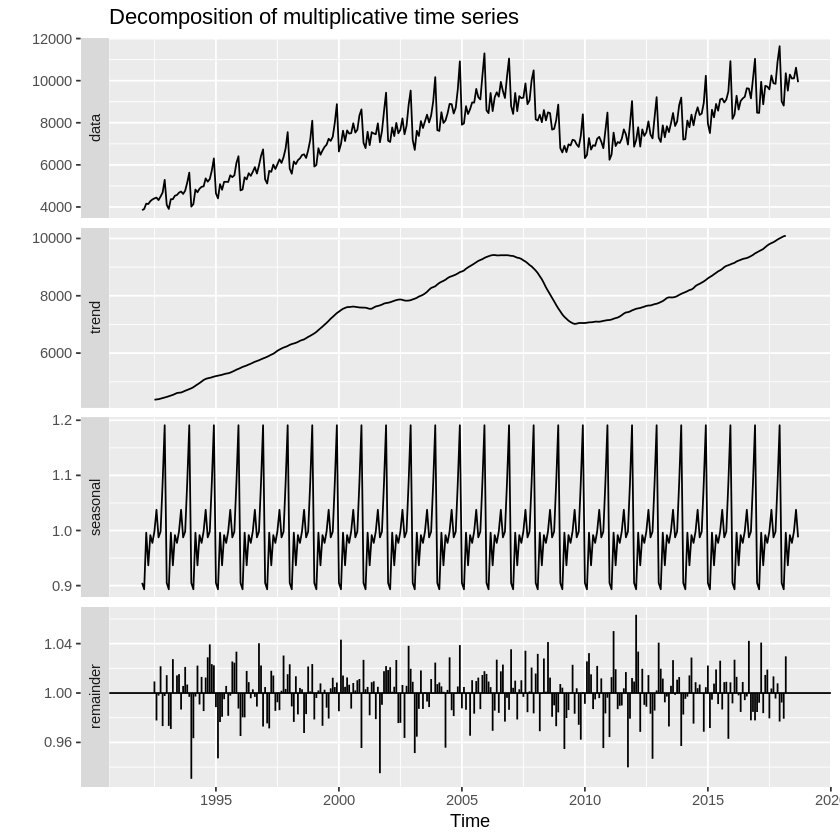

In [11]:
decomposed_sales_multiplicative <- decompose(sales, type = "multiplicative")
autoplot(decomposed_sales_multiplicative)

Наши исходные данные снова были разделены на те же 3 компонента. Теперь мы перемножаем их, чтобы получить исходные данные.

Следовательно,

$$данные = тренд * сезонность * остаток$$

Идеальным вариантом является значение, близкое к 1 для остатка. Поскольку умножение любого значения на 1 не меняет его значения, это означает, что данные могут быть полностью объяснены сезоном и трендом.

Для набора данных elec лучше использовать мультипликативную корректировку. Поскольку и тренд, и сезонное влияние увеличиваются, отношение сезонного влияния к трендовому значению достаточно постоянно. Это означает, что умножение на сезонный коэффициент будет полезным.

**Другие методы декомпозиции временных рядов**

То, что мы сделали выше, известно как классическая декомпозиция. Существует множество других методов, которые вы можете изучить и опробовать самостоятельно, включая разложение X11, разложение SEATS и разложение STL. Вы можете использовать функцию seas() из пакета seasonal, чтобы опробовать их. Эти методы могут оказаться более подходящими для ваших данных, поскольку некоторые из них позволяют сезонным факторам смещаться во времени.

Примечание: Только X11 и SEATS работают только с квартальными и месячными данными

**Метод прогнозирования 1: экспоненциальное сглаживание**

Метод экспоненциального сглаживания был предложен в 1950-х годах и является очень популярной формой прогнозирования. В этом методе прогнозируемые значения представляют собой средневзвешенное значение предыдущих значений.

*Наивный метод*

Это  базовая форма экспоненциального сглаживания, при которой прогнозируемое значение является непосредственным предыдущим значением. Другими словами, 100% веса приходится на непосредственно предыдущее значение. На самом деле это довольно точный метод прогнозирования цен на акции.

*Метод средних*

Это еще один очень простой метод прогнозирования. В нем прогнозируемое значение является средним значением всех предыдущих значений.

$$y_{t+1} = \sum( y_t + y_{t-1} + y_{t-2} + . . . ),$$

где $y_{t+1}$ - ближайшее будущее значение, $y_t$ - текущее значение, $y_{t-1}$ - предыдущее значение и так далее. Среднее значение временного ряда известно как уровень, поэтому в данном методе прогнозирования в качестве прогнозируемого значения используется уровень.

*Простое экспоненциальное сглаживание*

В этом случае
$$y_{t+1}= ay_t + a(1-a)y_{t-1} + a(1-a)^2y_{t-2}  + a(1-a)^3y_{t-2} + ....,$$

где $a$ - весовой коэффициент, который может находиться в диапазоне от 0 до 1. Вес ближе к 1 придает больший вес более свежим значениям, а вес ближе к 0 - более старым значениям.

Сумма всех этих коэффициентов должна быть приблизительно равна 1.

Вы можете использовать функцию ses(), чтобы применить простое экспоненциальное сглаживание. Вы можете задать значение для a с помощью параметра «alpha = », если вы его не укажете, оно будет оценено. Параметр «h = „ задает “горизонт» или длину прогноза.

Примечание: Простое экспоненциальное сглаживание будет генерировать одно и то же значение для каждого будущего значения.

Примечание: Все перечисленные выше методы прогнозирования будут работать, если в ваших данных нет сезонности.


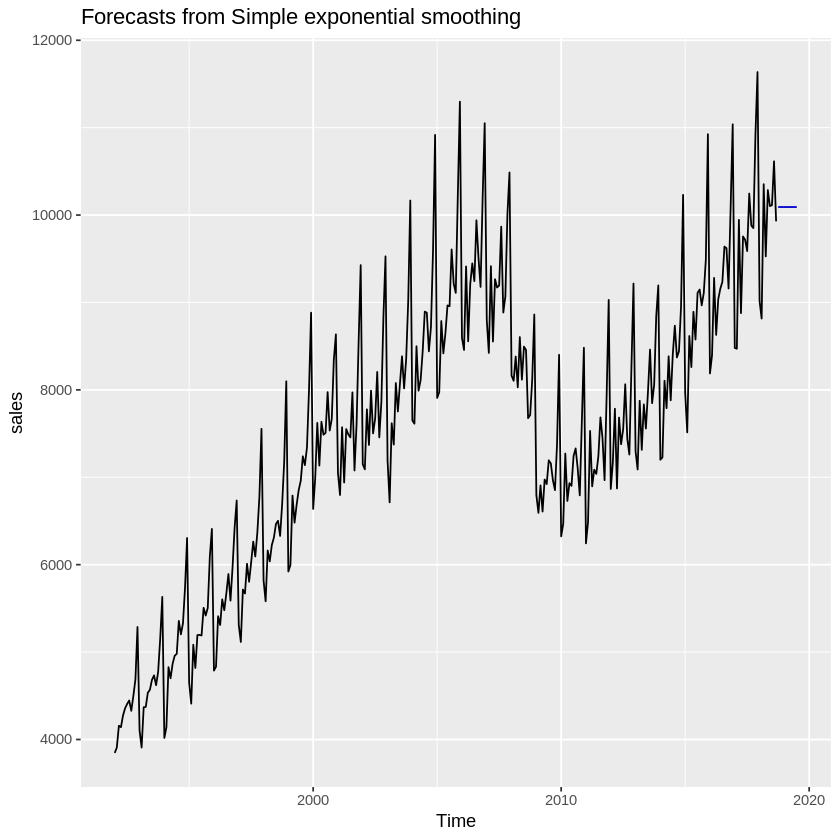

In [12]:
autoplot(ses(sales), PI = FALSE)

**Линейный тренд Хольта**

Этот метод допускает наличие тенденции, поэтому будущие значения теперь будут отличаться.

$$y_{t+h} = L_t + hb_t, $$

где $L_t$ - уровень в момент времени $t$, $h$ - горизонт (или количество периодов в будущем), который вы хотите спрогнозировать, а $b_t$ - наклон в момент времени $t$.

$L_t$ и $b_t$ генерируются из уравнений сглаживания, например простого экспоненциального сглаживания, с параметрами сглаживания.

$$L_t = ay_t + (1-a)(L_{t-1}+b_{t-1})$$
$$b_t = B(L_t-L_{t-1}) + (1-B)b_{t-1}$$

где $B$ и $a$ - параметры сглаживания, оба находятся в диапазоне от 0 до 1.

Чтобы использовать линейный тренд Хольта, воспользуйтесь функцией holt().


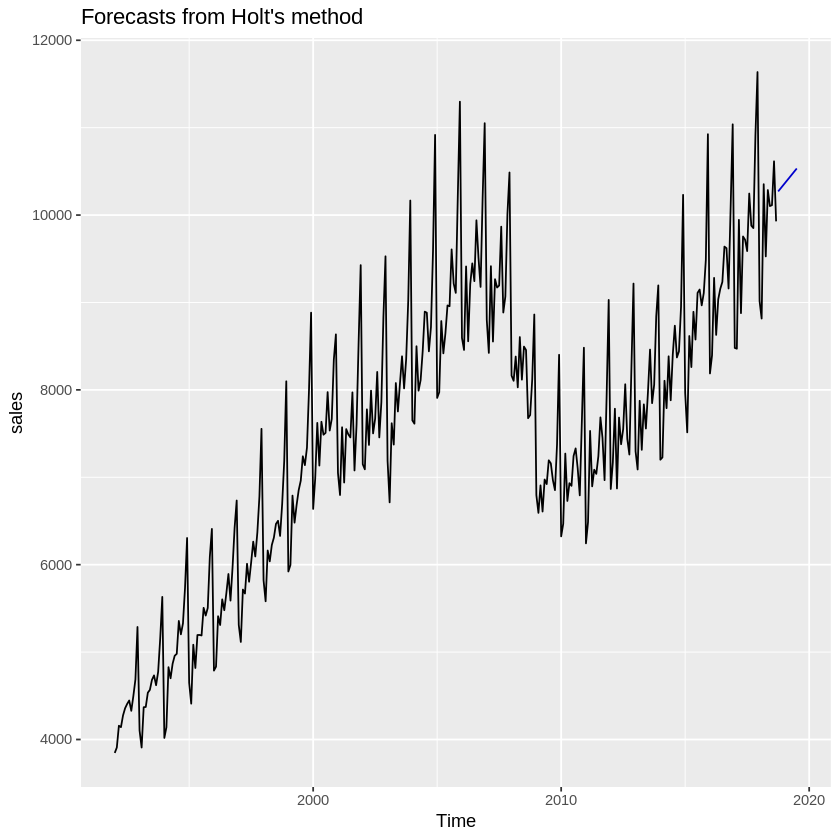

In [13]:
autoplot(holt(sales), PI = FALSE)

**Затухающий метод Хольта**

Иногда бывает глупо предполагать, что рост будет продолжаться с постоянной линейной тенденцией, особенно в долгосрочной перспективе. Например, продажи недавно представленного продукта могут быстро расти в начале, но затем замедляться, когда все потенциальные покупатели узнают о нем.

$$y_{t+h} = L_t + (D+D^2+D^3+...+D^h)b_t$$

$$L_t = ay_t + (1-a)(L_{t-1}+Db_{t-1})$$
$$b_t = B(L_t-L_{t-1}) + (1-B)Db_{t-1}$$

где $D$ - коэффициент затухания, от 0 до 1.

Чтобы использовать затухающий коэффициент Хольта, используйте «damped = TRUE» в функции holt().


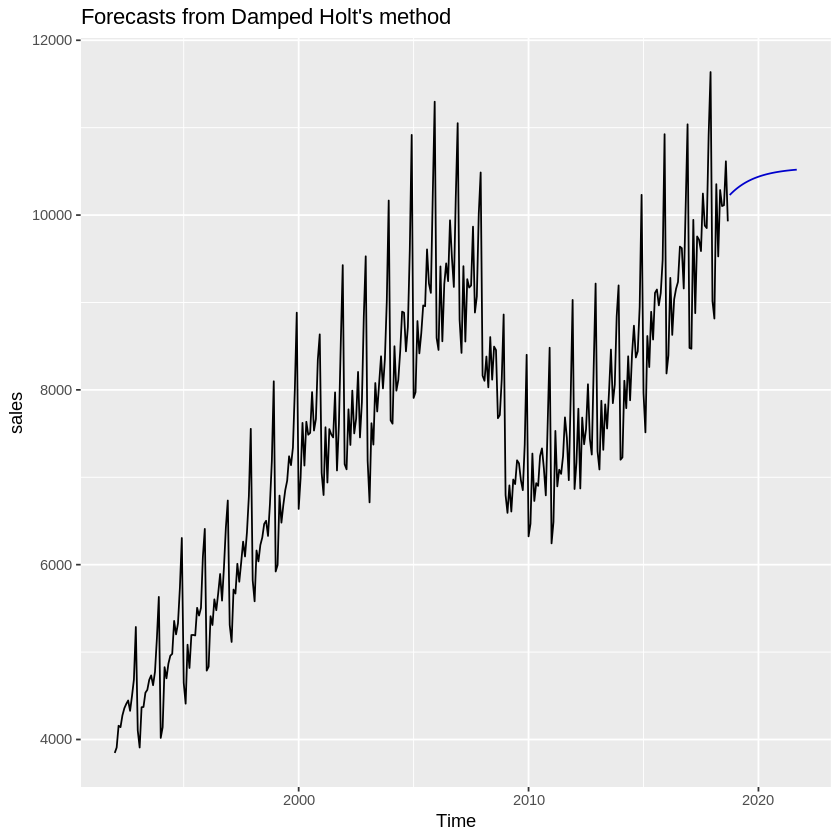

In [14]:
autoplot(holt(sales, damped = TRUE, h = 36), PI = FALSE)

**Сезонность Хольта-Уинтерса**

Мы можем ввести сезонный фактор в holt с помощью функции hw(). Эта сезонность может быть аддитивной или мультипликативной, как в нашем разложении временного ряда.

Примечание: Вы можете использовать аргумент «damped = TRUE» в функции hw().


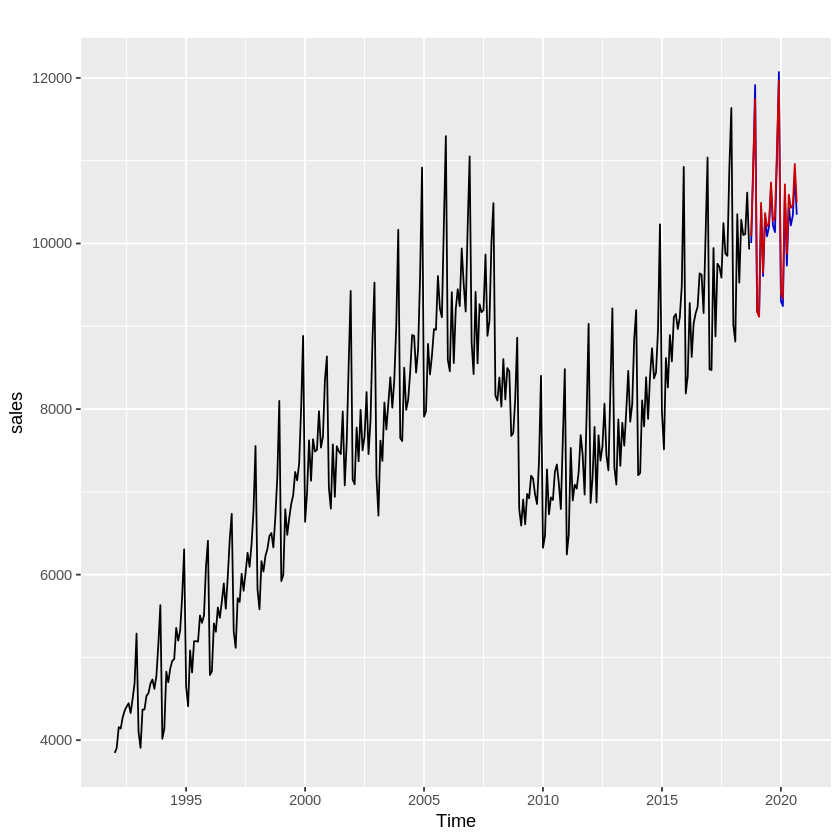

In [15]:
autoplot(sales) + autolayer(hw(sales, seasonal = "multiplicative", PI=FALSE)) + autolayer(hw(sales, seasonal = "additive", PI=FALSE), col="Red")

**ETS**

Помимо прогнозирования тренда и сезонных факторов, можно также прогнозировать остатки/ошибки. Вы можете использовать функцию ets() для выбора подходящей модели, которая может иметь мультипликативные или аддитивные коэффициенты для тренда, ошибок и сезонных эффектов. Функция ets() не выдает прогнозов, поэтому ее нужно обернуть в функцию forecast().

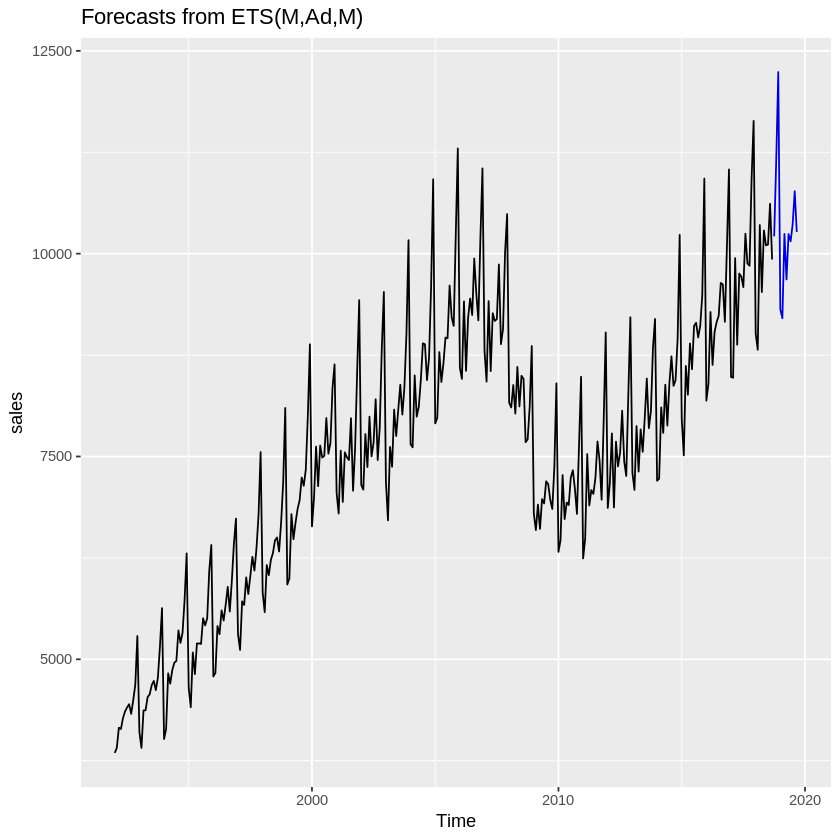

In [16]:
autoplot(forecast(ets(sales), h = 12, PI=FALSE))

Чтобы посмотреть на разложение модели экспоненциального сглаживания, просто вызовите функцию autoplot() на ets().



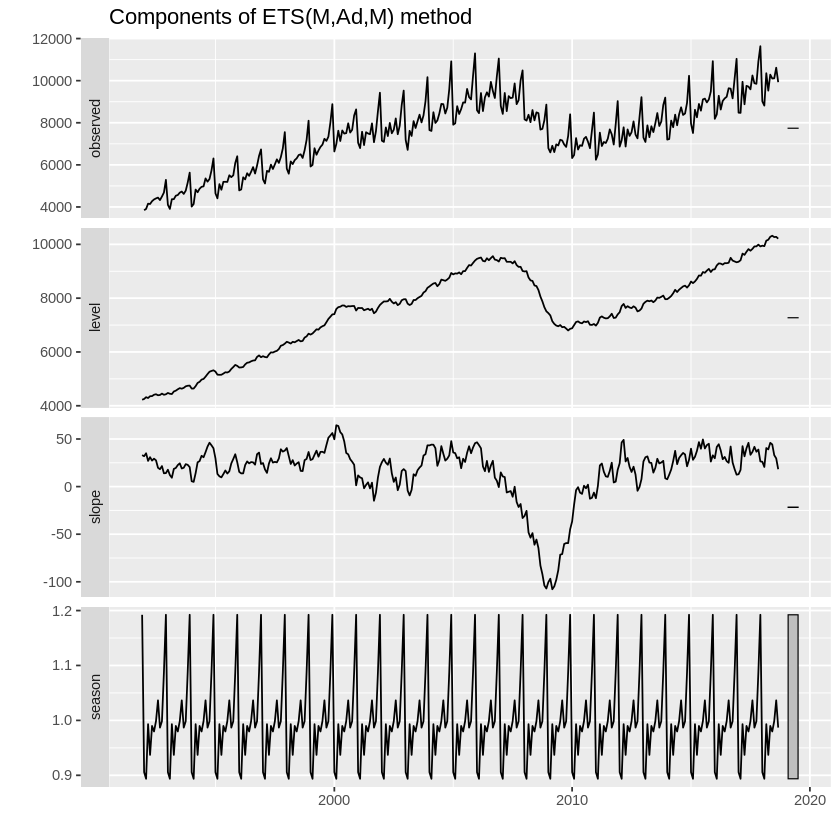

In [17]:
autoplot(ets(sales))

Чтобы получить представление о модели и ее параметрах, воспользуйтесь функцией summary()

In [18]:
summary(ets(sales))

ETS(M,Ad,M) 

Call:
ets(y = sales)

  Smoothing parameters:
    alpha = 0.3898 
    beta  = 0.0431 
    gamma = 1e-04 
    phi   = 0.977 

  Initial states:
    l = 4223.8364 
    b = 33.0948 
    s = 1.1923 1.0878 0.9985 0.9869 1.0365 0.9987
           0.9798 0.9899 0.9372 0.9931 0.8937 0.9057

  sigma:  0.0267

     AIC     AICc      BIC 
5257.218 5259.482 5325.103 

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE     MASE
Training set 7.354714 196.7804 153.5236 0.08186502 2.059539 0.359344
                    ACF1
Training set 0.007862331

**Метод прогнозирования 2: авторегрессия**

Авторегрессия - это регрессия, только значения $x$, которые мы используем для прогнозирования значений $y$, являются прошлыми значениями $y$. Другими словами, $y$ предсказывает будущие значения $y$. Сначала нам нужно узнать, хорошо ли прошлые значения предсказывают будущие. Мы можем увидеть корреляцию между серией и ее прошлыми значениями, построив график автокорреляции с помощью функции ggAcf().

Примечание: часто серии могут не иметь корреляции с прошлыми значениями, что делает авторегрессионную модель бесполезной.

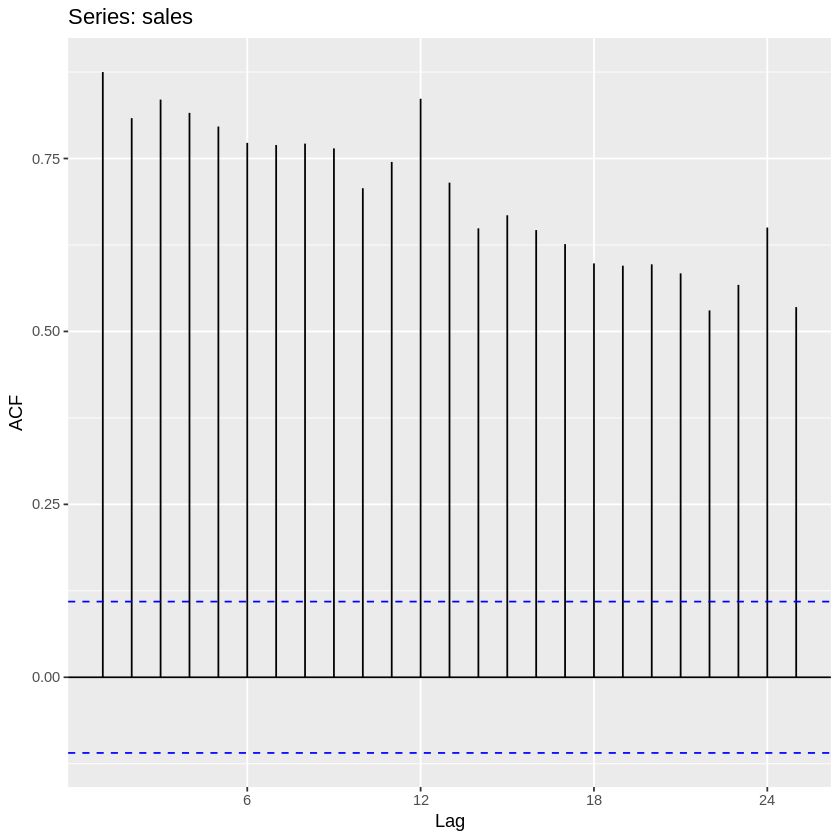

In [19]:
ggAcf(sales)

На оси x мы видим предыдущие периоды времени. На оси y мы видим корреляцию между elec и его количеством из временного периода на оси x.

Здесь мы видим сильную корреляцию между текущими значениями и предыдущим значением, как показано вертикальной полосой. Это имеет смысл, так как последнее значение дает представление о тенденции. Мы также видим довольно хорошую корреляцию со значением год назад. Это имеет смысл, поскольку пик значения приходится на одно и то же время каждый год.

Поскольку эти значения тесно связаны (т. е. высокая корреляция). Мы можем создать эффективную модель авторегрессии с помощью функции ar(). Она создаст линейную регрессию, находя коэффициенты между прошлыми и текущими значениями.

In [20]:
autoregression_sales <- ar(sales)
autoregression_sales


Call:
ar(x = sales)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.8187   0.0140   0.1290  -0.1174   0.1522  -0.0093  -0.0843   0.0369  
      9       10       11       12       13       14       15       16  
 0.1900  -0.2756  -0.0021   0.6540  -0.4697  -0.0564  -0.0605   0.0750  
     17       18       19       20       21       22       23       24  
-0.0769  -0.0386   0.1307  -0.0457  -0.1665   0.1873   0.0311   0.1907  
     25  
-0.2359  

Order selected 25  sigma^2 estimated as  166701

Функция ar() рекомендовала нам использовать порядок 25. Это означает, что мы используем предыдущие 25 значений для предсказания следующего. Коэффициенты также показаны нам


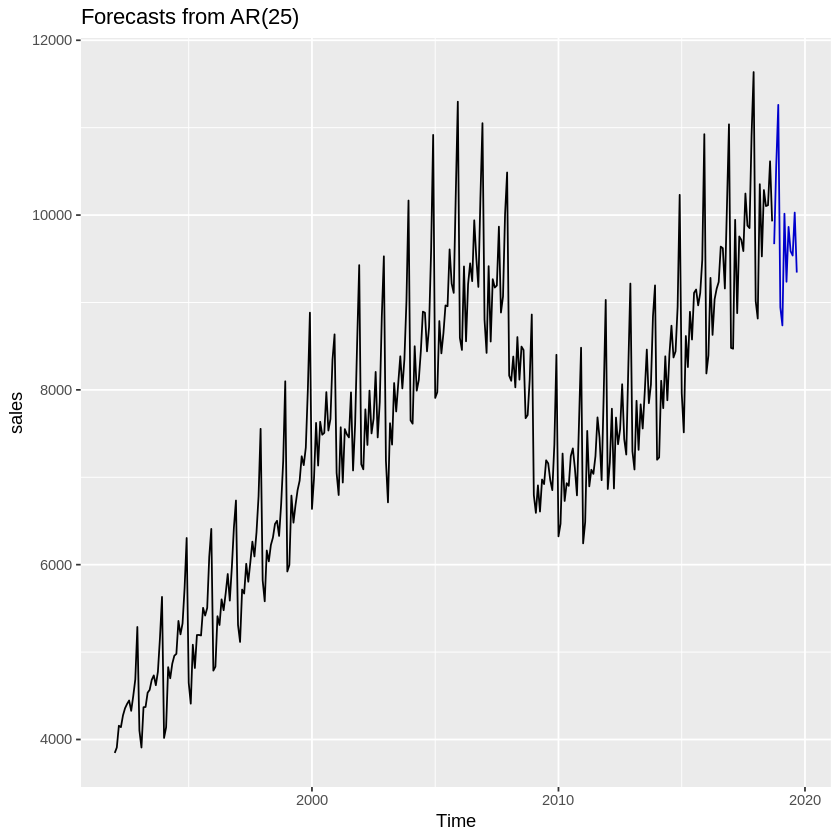

In [21]:
autoplot(forecast(autoregression_sales, level = 0, h = 12))

Вы можете заметить, что визуально эта модель выглядит не так, как мы ожидаем. Вместо этого давайте десезонируем данные, попробуем их предсказать, а затем повторно сезонируем.


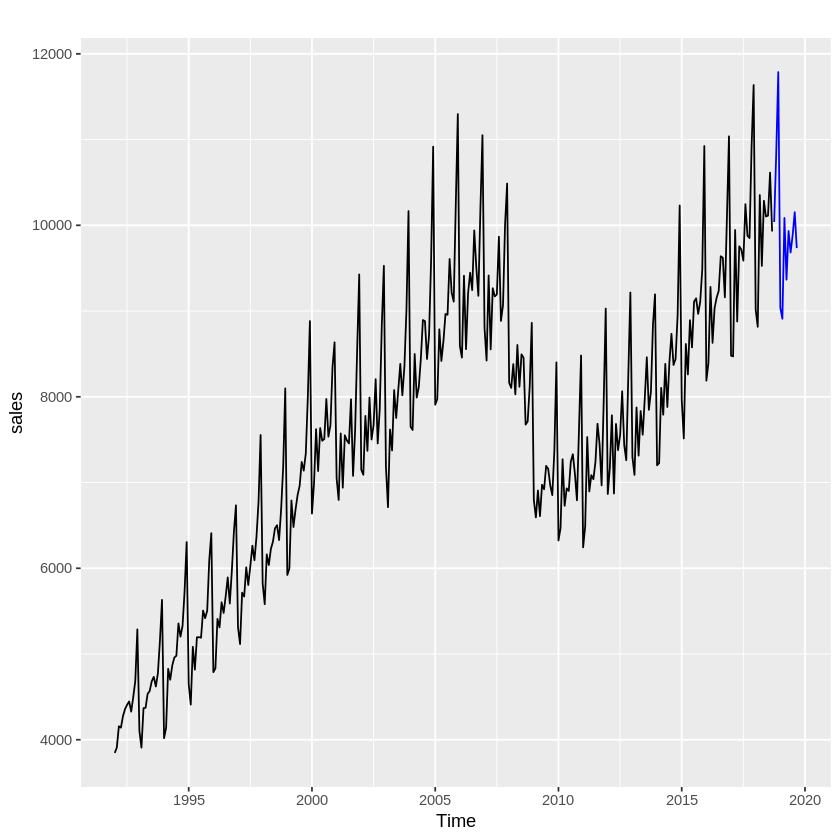

In [22]:
decomposed_sales <- seas(sales) # time series decomposition
decomposed_sales <- data.frame(decomposed_sales$data) # makes a data frame out of the output of seas() which is not a data frame
time_series_sales_trend <- ts(decomposed_sales$trend, frequency = 12, start = 1992) # turn the trend into a time series
ar_forecast <- forecast(ar(time_series_sales_trend), h = 12) # forecast the trend
autoplot(sales) + autolayer(ar_forecast$mean * tail(decomposed_sales$seasonal, 12), color="blue") # ar_forecast$mean gives us our forecast
# We multiply by the last 12 seasonal factors to resesonalize, using tail
# Use tail() to select the last values of something, passing in 12 to give us the most recent seasonal factors. tail() works like head()
# autolayer() adds another series to a plot

**Метод прогнозирования 3: ARIMA**

ARIMA - это метод прогнозирования, названный так по его составляющим, а именно

**AR**: авторегрессия, о которой мы уже говорили.

**I**: Интеграция (также известная как дифферинцирование)

**MA**: скользящее среднее

*Дифференцирование*

Сначала мы поговорим о компоненте «I», который известен как дифференцирование. Сезонная разница - это разница между наблюдением и предыдущим наблюдением, относящимся к тому же сезону.

Следовательно, $y_{change} = y_t - y_{t-1}.$

Если бы все движения в нашем временном ряду были случайными, то мы бы предсказали, что ychange будет равен 0.

Таким образом, $y_t = y_{t-1} + ошибка$

Если движения во временном ряду случайны, мы называем это случайным блужданием.

Преимущество дифференцирования в том, что если в наших данных есть постоянный рост, то он будет зафиксирован. Если гипотетически рост продаж с прошлого по текущий месяц составил 5, мы можем предсказать, что в следующем месяце продажи будут на 5 больше, чем в этом.

*Скользящее среднее*

Мы можем создать регрессионную модель, используя средневзвешенное значение прошлых ошибок нашего прогноза. Это не скользящее среднее, как в экспоненциальном сглаживании, это скользящее среднее остатков нашей модели, поэтому, если мы постоянно недооцениваем наши данные, это будет исправлено.

$$y_t = константа + B_1error_{t-1} + B_2error_{t-2} + B_3error_{t-3} + ....$$

где $B_t$ - коэффициенты регрессии.

Зачем нужно включать скользящее среднее значение ошибок? Чтобы ответить на этот вопрос, рассмотрим график разложения.


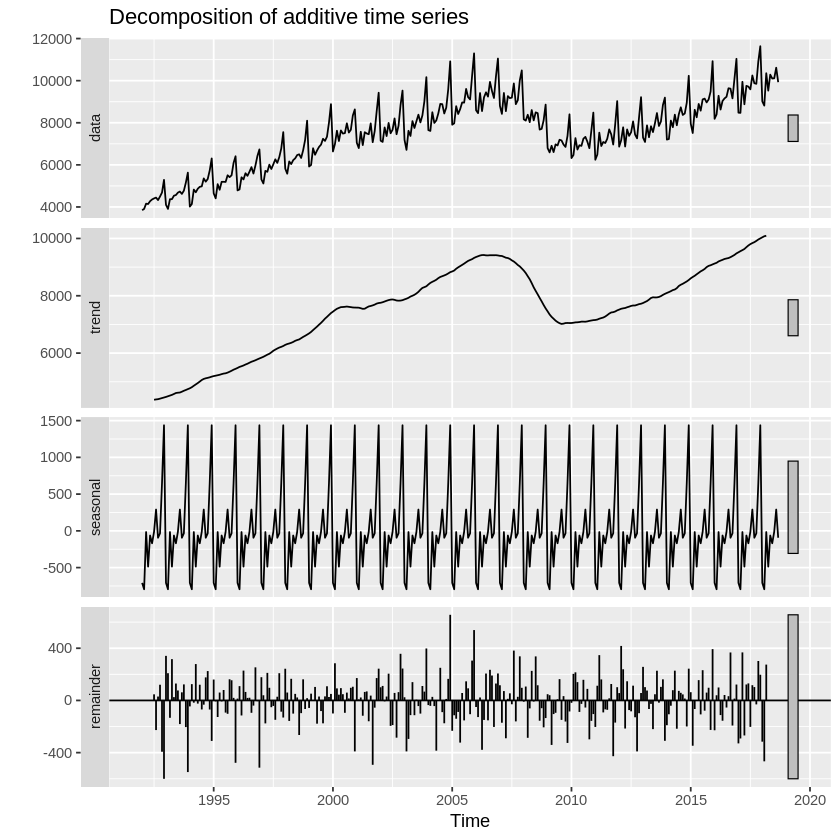

In [23]:
autoplot(decompose(sales))

Если вы посмотрите на график остатков, то заметите, что часто положительные остатки следуют за положительными, а отрицательные - за отрицательными. Если вы добавите остаток предыдущего месяца к остатку следующего месяца, то этот остаток будет близок к 0.

*Объединение в ARIMA*

Модель ARIMA - это просто сумма компонентов AR, дифференции и MA.

Мы сокращаем модель ARIMA следующим образом arima(p, d, q)(p, d, q)

**p** указывает порядок авторегрессии

**d** указывает количество раз, когда происходит дифферинцирование

**q **- количество предыдущих значений, которые мы используем для скользящего среднего.

Первый набор скобок указывает на несезонные (т.е. предыдущие) значения в модели.
Второй набор скобок указывает на сезонные значения, используемые в модели.

Функция Arima(data, order = (p, d, q), seasonal = (p, d, q))

Попробуем спрогнозировать продажи с помощью Arima(1,1,1), таким образом, мы используем 1 значение в авторегрессии, 1 разницу и 1 ошибку в скользящем среднем.


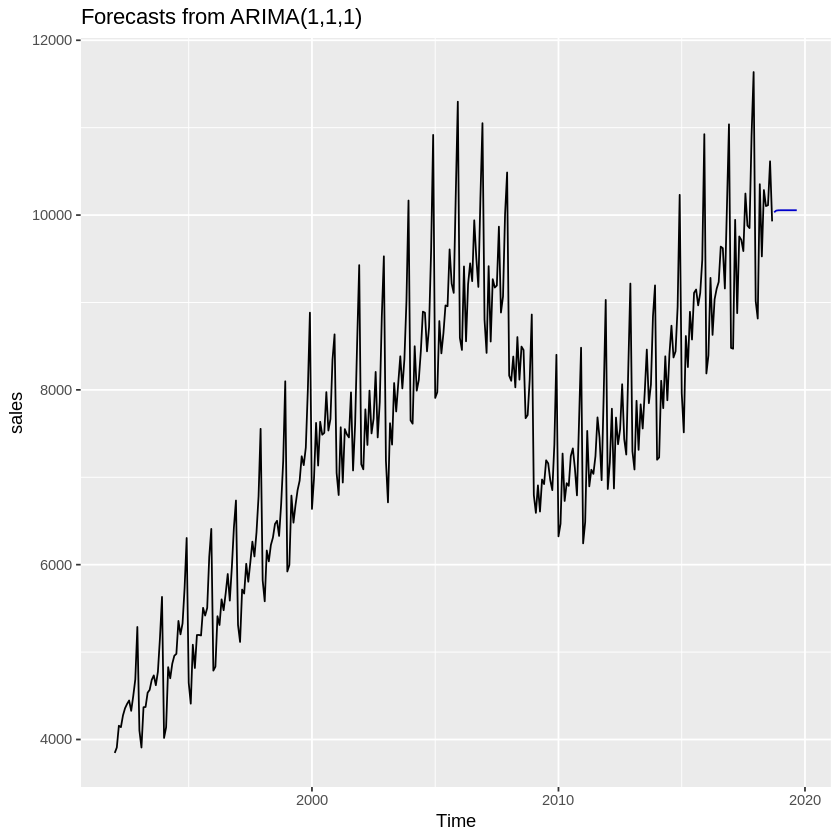

In [24]:
autoplot(forecast(Arima(sales, order=c(1,1,1)), h = 12), PI = FALSE)

Обратите внимание, что эта модель не очень хороша. Лично я не умею интуитивно выбирать лучшую модель ARIMA. Функция auto.arima() проверяет значения до 5 для каждого компонента и выбирает лучшую на основе AIC, которая является мерой ошибки, которую трудно объяснить без более глубокого понимания статистики.


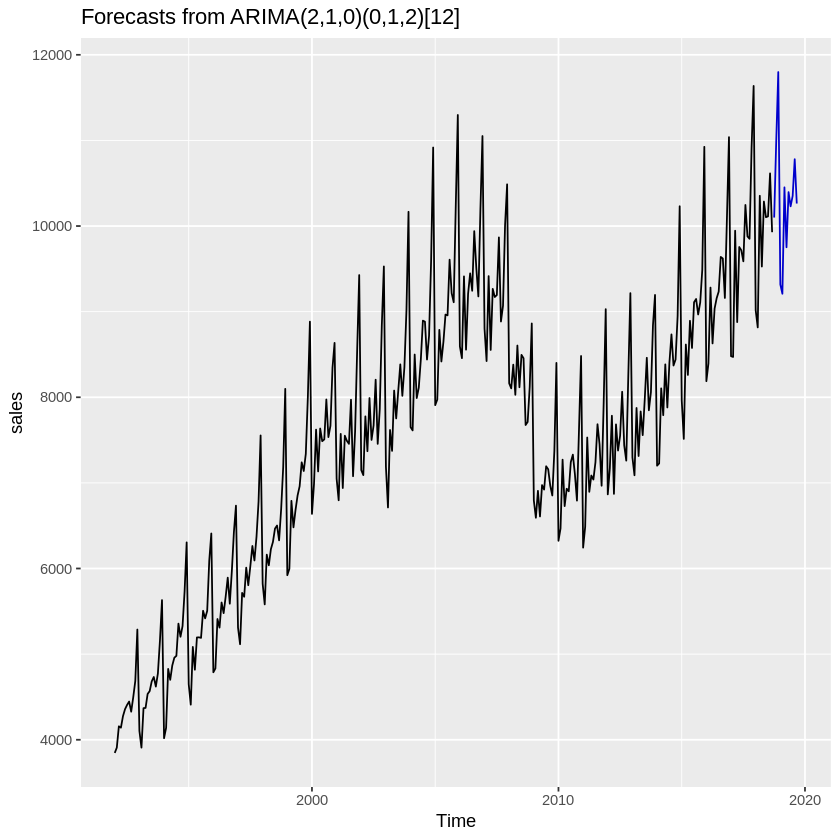

In [25]:
autoplot(forecast(auto.arima(sales), h = 12), PI = FALSE)

Функция auto.arima() рекомендовала нам использовать в регрессии 2 прошлых значения: прошлое значение для разности, прошлое значение того же сезона для сезонной разности и 2 прошлые ошибки ошибок того же сезона.
